<a href="https://colab.research.google.com/github/musafir-1194/speech-recognition-tut/blob/main/speech_recognition_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import wave

In [28]:
## Audio signal paramters
# - number of channels
# - sample widht
# - framerate / sample_rate : 44, 100 Hz
# - number of frames
# - values of a frame

In [29]:
obj = wave.open('speech-data/03-01-05-01-02-02-01.wav', 'rb')

In [30]:
print('Number of channels: ', obj.getnchannels())
print('Sample width: ', obj.getsampwidth())
print('Frame rate: ', obj.getframerate())
print('Number of frames: ', obj.getnframes())
print('Parameters: ', obj.getparams())

# get time of the audio - will be in seconds
audio_time = obj.getnframes() / obj.getframerate()
print('Audio time: ', audio_time)

Number of channels:  1
Sample width:  2
Frame rate:  48000
Number of frames:  179379
Parameters:  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=179379, comptype='NONE', compname='not compressed')
Audio time:  3.7370625


In [31]:
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames) / 2)

<class 'bytes'> <class 'int'>
179379.0


In [32]:
obj.close()

In [33]:
import wave
import matplotlib.pyplot as plt
import numpy as np

In [34]:
obj = wave.open('speech-data/03-01-05-01-02-02-01.wav', 'rb')

In [35]:
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

In [36]:
t_audio = n_samples / sample_freq
print(t_audio)

3.7370625


In [37]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
times = np.linspace(0, t_audio, num = n_samples)

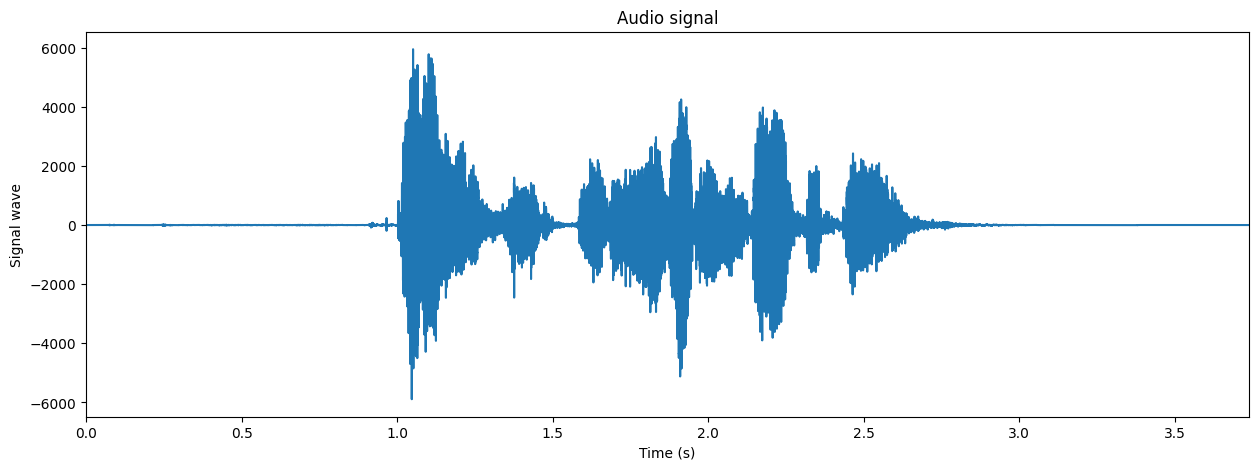

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio signal')
plt.ylabel('Signal wave')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [6]:
# Recording
import pyaudio
import wave
FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

print('start recoding ...')

seconds = 5
frames = []
for i in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
  data = stream.read(FRAMES_PER_BUFFER)
  frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

obj = wave.open('ouput.wave', 'wb')
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b"".join(frames))

start recoding ...


In [7]:
# Speech Recognition
### Collecting a dataset of speech signals from male and female speakers, and labeling them accordingly.
### Extracting features from the speech signals, such as pitch, frequency, energy, zero-crossing rate, cepstral coefficients, etc
#### These features can capture the differences between male and female voices, such as vocal tract length, vocal fold thickness, etc.
### Normalizing and scaling the features to make them comparable and reduce the effect of outliers.
### 